In [203]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as ny # linear algebra
import pandas as ps # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [204]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [205]:
dataset =  ps.read_csv('/kaggle/input/churn-modelling/Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [206]:
dataset.shape

(10000, 14)

In [207]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [208]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [209]:
dataset.duplicated().sum()

0

In [210]:
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [211]:
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [212]:
dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [213]:
dataset.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [214]:
dataset = ps.get_dummies(dataset, columns = ['Geography', 'Gender'], drop_first = True)
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [215]:
x = dataset.drop(columns = ['Exited'])
y = dataset['Exited']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [216]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [217]:
from  sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrainscaled = scaler.fit_transform(xtrain)
xtestscaled = scaler.transform(xtest)

In [218]:
model = Sequential()
model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [219]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_34 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_35 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_36 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 12        
Total params: 540
Trainable params: 540
Non-trainable params: 0
_________________________________________________________________


In [220]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [221]:
history = model.fit(xtrainscaled, ytrain, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5377 - accuracy: 0.7889 - val_loss: 0.4736 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4491 - accuracy: 0.7981 - val_loss: 0.4324 - val_accuracy: 0.8069
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4151 - accuracy: 0.8100 - val_loss: 0.4022 - val_accuracy: 0.8225
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3910 - accuracy: 0.8255 - val_loss: 0.3808 - val_accuracy: 0.8406
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3724 - accuracy: 0.8388 - val_loss: 0.3673 - val_accuracy: 0.8475
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3617 - accuracy: 0.8505 - val_loss: 0.3588 - val_accuracy: 0.8419
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3548 - accuracy: 0.8519 - val_loss: 0.3568 - val_accuracy: 0.8500

In [222]:
model.layers[0].get_weights()

[array([[ 3.30482185e-01,  9.75497514e-02, -1.34973660e-01,
          5.23123555e-02,  2.31408644e-02,  5.49118482e-02,
          1.71459392e-01,  5.01947403e-01,  2.53363815e-03,
         -2.21736789e-01,  2.22397726e-02],
        [ 2.98790365e-01,  5.24092019e-01,  2.58871257e-01,
          5.36820292e-01, -4.63772506e-01, -5.03505766e-01,
         -5.14481306e-01,  1.61425769e-02, -2.85191592e-02,
         -7.36297131e-01,  6.87716782e-01],
        [ 5.08421548e-02, -5.02731800e-02,  2.12071568e-01,
          1.35886312e-01,  1.50761425e-01, -9.38459262e-02,
          1.05968371e-01, -6.69357255e-02,  1.73958004e-01,
          1.83560010e-02, -7.38383085e-02],
        [-1.06915362e-01, -1.34735227e-01, -6.43837631e-01,
         -2.44926512e-01, -1.99856520e-01, -5.64993620e-01,
         -6.51416659e-01,  2.72583842e-01, -5.80219209e-01,
         -5.04283197e-02,  2.87059814e-01],
        [ 6.99046075e-01, -1.92754641e-01, -8.89345884e-01,
         -1.60217077e-01, -1.42748579e-01, -

In [223]:
model.layers[1].get_weights()

[array([[ 0.52432823, -0.00764382,  0.39531654,  0.7216299 ,  0.3069631 ,
          0.52417123,  0.21011943, -0.37882072, -0.55985737, -0.5019685 ,
         -0.01449283],
        [-0.22033098, -0.23341244, -0.60417336,  0.67706865,  0.00404432,
         -0.13718508, -0.09301106,  0.03221188,  0.42654836, -0.60402656,
         -0.15617381],
        [-0.23290297,  0.07012885, -0.5426889 ,  0.40343088,  0.03647774,
          0.45629966, -0.19325513,  0.51161236, -0.2596027 ,  0.63908076,
         -0.02398272],
        [-0.24628305,  0.48436302,  0.36394748, -0.30743235, -0.74007916,
         -0.818018  ,  0.14377871,  0.06827121,  0.20591116,  0.43133512,
          0.8618595 ],
        [ 0.36901653,  0.1626441 ,  0.19531853, -0.12866785, -0.26415598,
         -0.37776482,  0.15003325, -0.10515645, -0.28827843, -0.44028628,
          0.6466688 ],
        [ 0.41949132,  0.47910902, -0.5229977 ,  0.32248947,  0.2370627 ,
         -0.5038393 ,  0.16271642,  0.3731914 , -0.76509476,  0.0555495

In [224]:
model.layers[2].get_weights()

[array([[ 5.69315612e-01,  5.20915866e-01,  3.54179680e-01,
         -4.06418204e-01,  5.39202213e-01, -2.29065046e-01,
          3.72901559e-01,  6.86346442e-02,  2.43316114e-01,
          2.39643991e-01,  1.27669498e-01],
        [-1.03500329e-01, -3.38165164e-01, -1.29149938e+00,
          5.27085364e-03, -8.97534471e-03, -1.22155201e+00,
          4.40389186e-01,  2.27876395e-01, -8.47971439e-01,
          8.48724134e-03, -3.38954806e-01],
        [-1.01447076e-01,  3.79000455e-01, -4.53112543e-01,
         -3.25560182e-01, -1.50971800e-01,  4.88062710e-01,
         -3.32295969e-02,  2.16314003e-01,  7.85706997e-01,
         -5.62888980e-01,  2.90811390e-01],
        [ 3.22603792e-01, -2.45569408e-01, -5.48500836e-01,
          1.45339072e-01,  3.95610809e-01, -1.59839138e-01,
          1.62374824e-01,  5.43990016e-01, -3.43293399e-01,
          2.60152686e-02,  4.71032530e-01],
        [-3.33034694e-01,  4.48847979e-01, -2.94025481e-01,
          5.24365723e-01, -5.19411087e-01,  

In [225]:
model.layers[4].get_weights()

[array([[ 0.43917206],
        [-0.6358815 ],
        [ 0.6513625 ],
        [-0.4059984 ],
        [ 0.62927926],
        [ 0.8268209 ],
        [ 1.4482579 ],
        [-0.13845287],
        [-0.7578295 ],
        [ 0.21532652],
        [-0.9044967 ]], dtype=float32),
 array([-0.0952916], dtype=float32)]

In [226]:
model.predict(xtestscaled)

array([[0.03089988],
       [0.07117352],
       [0.04550651],
       ...,
       [0.00416458],
       [0.04845729],
       [0.6705678 ]], dtype=float32)

In [227]:
ylog = model.predict(xtestscaled)

In [228]:
ny.where(ylog > 0.5, 1, 0) 

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [229]:
ypred = ny.where(ylog > 0.5, 1, 0) 

In [230]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.863

In [231]:
history

In [232]:
history.history

{'loss': [0.5376619100570679,
  0.4490942656993866,
  0.4150514304637909,
  0.3910462260246277,
  0.3723670542240143,
  0.361724317073822,
  0.3548339605331421,
  0.3497891128063202,
  0.3452425003051758,
  0.3435344696044922,
  0.34074461460113525,
  0.3384038209915161,
  0.33636748790740967,
  0.33460837602615356,
  0.33490902185440063,
  0.33155784010887146,
  0.3319269120693207,
  0.3310495615005493,
  0.3306155800819397,
  0.3287287652492523,
  0.32906052470207214,
  0.3283357620239258,
  0.32691726088523865,
  0.3266682028770447,
  0.3265843093395233,
  0.324518084526062,
  0.3248338997364044,
  0.3245338797569275,
  0.32486313581466675,
  0.32481181621551514,
  0.3231677711009979,
  0.3220255672931671,
  0.32284247875213623,
  0.3225288391113281,
  0.3214639723300934,
  0.3213927447795868,
  0.321694552898407,
  0.32133620977401733,
  0.32121342420578003,
  0.3211231231689453,
  0.32028254866600037,
  0.3207736909389496,
  0.31983450055122375,
  0.3187660872936249,
  0.320497244

In [233]:
# import plotly.express as px
import matplotlib.pyplot as plt

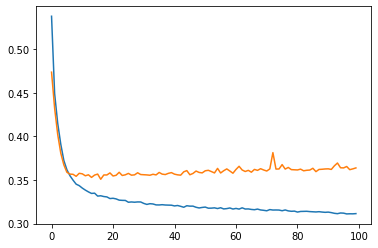

In [234]:
# fig = px.line(history, x="Epoch", y="loss", tiafmtle='Loss Rate')
# fig.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

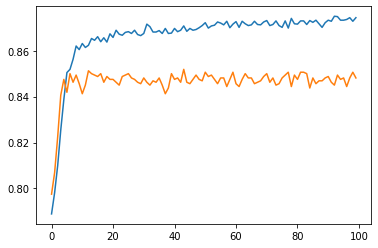

In [235]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])